In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Programming Questions
### 1. Correlations
##### 1.1 Scatter Plots
Setup: read data from DF1 in HW2_Data.zip

In [7]:
df1 = pd.read_table('DF1', sep = ',', index_col=0)

Scatter plot of each column againt each other column.

G:\Anaconda2\envs\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000058D4F25470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000058D59D6F98>]], dtype=object)

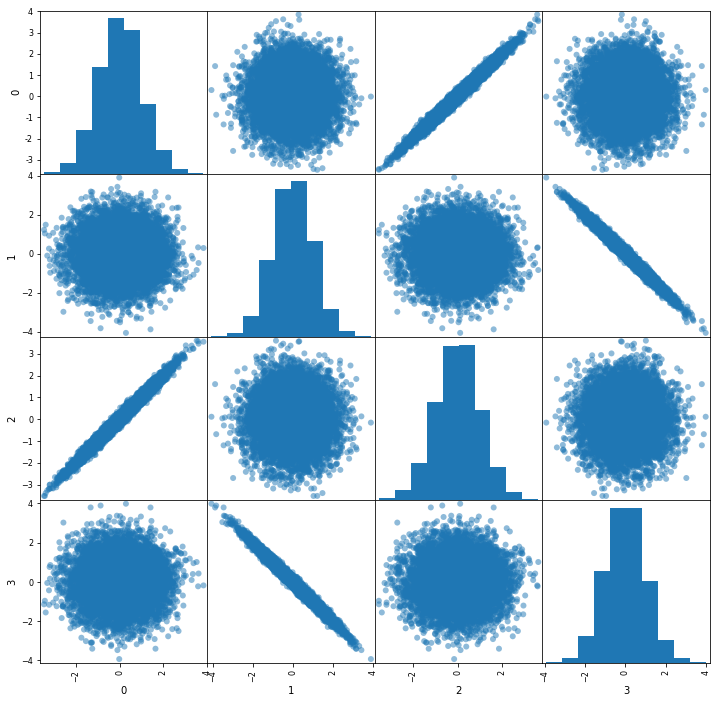

In [14]:
# User Pandas to draw the plot.
pd.scatter_matrix(df1, figsize = (12, 12), marker = 'o')

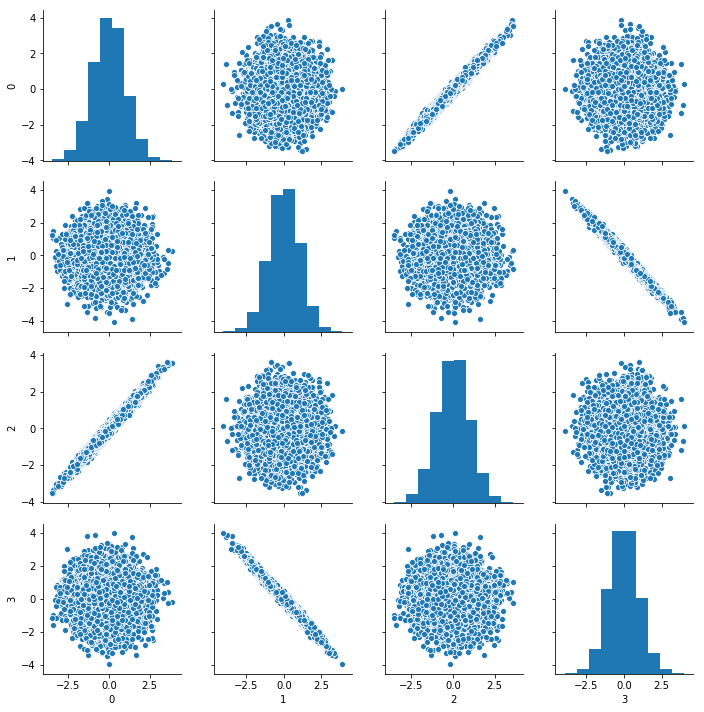

In [10]:
# Use Seaborn to draw the pair scatter plots.
sns.pairplot(df1)

##### 1.2 Covariance Matrix
Explicit expression for the covariance matrix of the data.<br>
Suppose that each column is $\vec{x_i}$, and covariance of two vectors $\vec{x_i}\, and \vec{x_j}$ equals to:
$$cov[\vec{x_i},\vec{x_j}=E[(\vec{x_i}-E[\vec{x_i}])(\vec{x_j}-E[\vec{x_j}])]$$.
When it comes to the covariance matrix,
$$Cov = 
\begin{bmatrix}
E[(\vec{x_0}-E[\vec{x_0}])(\vec{x_0}-E[\vec{x_0}])] & E[(\vec{x_0}-E[\vec{x_0}])(\vec{x_1}-E[\vec{x_1}])] & ...  & E[(\vec{x_0}-E[\vec{x_0}])(\vec{x_3}-E[\vec{x_3}])] \\
E[(\vec{x_1}-E[\vec{x_1}])(\vec{x_0}-E[\vec{x_0}])] & E[(\vec{x_1}-E[\vec{x_1}])(\vec{x_1}-E[\vec{x_1}])] & ...  & E[(\vec{x_1}-E[\vec{x_1}])(\vec{x_3}-E[\vec{x_3}])] \\
\vdots & \vdots & \vdots & \vdots \\
E[(\vec{x_3}-E[\vec{x_3}])(\vec{x_0}-E[\vec{x_0}])] & E[(\vec{x_3}-E[\vec{x_3}])(\vec{x_1}-E[\vec{x_1}])] & ...  & E[(\vec{x_3}-E[\vec{x_3}])(\vec{x_3}-E[\vec{x_3}])] 
\end{bmatrix}
$$

In [9]:
# User Pandas to compute correlations between columns.
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


As we can see from the result, column 0 and column 2 are highly positively correlated while column 1 and column 3 are highly negatively correlated. The figures above illustrate the ideas more visually, as the scatter plot of column 0 and column 2 appears to be linear related which the slope is positive while the scatter plot of column 1 and column 3 shows negative linear relationship.

##### 1.3 Multivariate Gaussian random variable
Generate a zero-mean multivariate Gaussian random variable in 3 dimensions, $Z = (X_1, X_2, X_3)$ so that $(X_1, X_2)$ and $(X_1, X_3)$ are uncorrelated, but $(X_2, X_3)$ are correlated. So, we choose the covariance matrix as follows.
$$cov(Z) = \begin{bmatrix}
1 & 0 & 0 \\
0 & 4 & 4.8\\
0 & 4.8 & 9
\end{bmatrix}$$.
$$mean = [0, 0, 0]$$

In [15]:
# Assigned parameters of the multivariate Gaussian random variable.
cov = np.array([[1, 0, 0], [0, 4, 4.8], [0, 4.8, 9]])
mean = np.array([0, 0, 0])

In [16]:
# Generate sample datas and separate it to each dimension.
sample_num = 1000
x1, x2, x3 = np.random.multivariate_normal(mean, cov, sample_num).T

In [18]:
x2

array([ -3.77205622e+00,   1.29357824e+00,  -1.26704546e+00,
         1.02194712e+00,  -6.56111530e-01,  -6.71142500e-01,
        -7.69838861e-01,  -6.61396658e-01,  -1.86014164e+00,
         6.58447132e-01,  -2.86727437e+00,   8.20820598e-01,
         1.58709191e+00,  -1.41053707e+00,   3.31755133e+00,
         1.02025422e+00,  -2.72349838e+00,  -4.52769626e+00,
        -2.70073431e+00,  -9.48590677e-01,   1.62548001e-01,
        -1.10166014e+00,  -1.94525749e-01,  -2.01748319e-01,
         2.51446459e-01,  -1.32503218e-02,  -5.04510731e-01,
        -2.67882647e+00,  -6.56518516e-01,  -2.21504144e+00,
        -8.93127549e-01,  -3.48516057e-01,  -3.27350701e+00,
        -1.89196687e+00,  -1.52073176e+00,  -3.11564655e+00,
        -7.31662431e-01,  -3.84559420e-01,   2.18228435e+00,
         1.37651857e+00,  -6.13688268e-01,  -1.89526912e+00,
        -1.22248813e+00,   1.17349452e-01,   3.59961125e-01,
         1.58319647e+00,   2.40828650e+00,  -6.68078387e-01,
        -1.77096604e+00,

In [22]:
(x2.T).shape

(1000,)

In [24]:
np.array([x2, x3]).T.shape

(1000, 2)

In [26]:
# Calculate the covariance of X2 and X3
np.cov(np.array([x2, x3]))

array([[ 3.93551509,  4.60875109],
       [ 4.60875109,  8.88706083]])

Choose one of the non-zero covariance term ($C_{ij}$, if C denotes the covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales.

In [31]:
normal_var = pd.DataFrame(data = np.random.multivariate_normal(mean, cov, sample_num))

In [33]:
normal_var.corr()

,0,1,2
0,1.000000,0.013036,0.024654
1,0.013036,1.000000,0.822081
2,0.024654,0.822081,1.000000


In [46]:
testSample = normal_var.values
np.cov(testSample.T)

array([[ 1.04325624,  0.02669036,  0.07433841],
       [ 0.02669036,  4.0182102 ,  4.86480176],
       [ 0.07433841,  4.86480176,  8.71501789]])

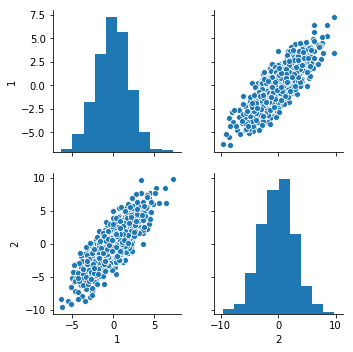

In [45]:
sns.pairplot(normal_var.ix[:, [1,2]])

### 2. Outliers - Optional

### 3. Even More Standard Error

### 4. Names and Frequencies

In [156]:
def topK(k, year):
    names_df = pd.read_csv('./Names/yob{}.txt'.format(year), header=None)
    print('The top {} names for {} are:'.format(k, year))
    sorted = names_df.sort_values([2], axis=0, ascending=False)
    return list(sorted.head(k)[0])

topK(10, 1880)

The top 10 names for 1880 are:


['John',
 'William',
 'Mary',
 'James',
 'Charles',
 'George',
 'Frank',
 'Joseph',
 'Anna',
 'Thomas']

In [171]:
def nameFreq(name):
    year = 2015
    names_df = pd.read_csv('./Names/yob{}.txt'.format(year), header=None)
    total = len(names_df)
    unique = len(names_df[0].unique())
    print("""
    In {year}, there are {total} total names and {unique} unique
    names leaving {diff} names that are duplicates which represent
    M and F with the same name. These names are the target. If you\'ve
    entered a name that is not included in that list you will receive
    only one result. Some sample names that appear for both M and F:
    Aarya, Adam, Zyon        
    """.format(year=year, total=total, unique=unique, diff=(total - unique)))
    
    target = names_df[names_df[0] == name]
    display(target)
    
nameFreq('Zyon')


    In 2015, there are 32952 total names and 30460 unique
    names leaving 2492 names that are duplicates which represent
    M and F with the same name. These names are the target. If you've
    entered a name that is not included in that list you will receive
    only one result. Some sample names that appear for both M and F:
    Aarya, Adam, Zyon        
    


,0,1,2
4819,Zyon,F,29
20223,Zyon,M,147


In [179]:
def relativeFreq(name, year):
    print('{}:'.format(year))
    names_df = pd.read_csv('./Names/yob{}.txt'.format(year), header=None)
    names_df.columns = ['Name', 'Gender', 'Freq']
    totalFreq = names_df['Freq'].sum()
    names_df['Rel. Freq'] = names_df['Freq'] / totalFreq
    
    display(names_df[names_df['Name'] == name])
    
relativeFreq('Mike', 1880)
relativeFreq('Mike', 2015)

1880:


,Name,Gender,Freq,Rel. Freq
1084,Mike,M,95,0.000472


2015:


,Name,Gender,Freq,Rel. Freq
20024,Mike,M,194,0.000053


In [198]:
# def popularitySwitch():

test = pd.read_csv('./Names/yob2015.txt'.format(year), header=None)
test.columns = ['Name', 'Gender', 'Freq']

# test[len(test['Name']) > 2]

test.groupby('Name').count()

# test['Name'].count()
    

,Gender,Freq
Name,,
Aaban,1,1
Aabha,1,1
Aabriella,1,1
Aada,1,1
Aadam,1,1
Aadan,1,1
Aadarsh,1,1
Aaden,1,1
Aadhav,1,1


### 5. Regression and Interaction Terms